In [3]:
from sklearn.metrics import accuracy_score
from utils import calculate_FPR_TPR, plot_ROC_curve, plot_All_ROC_curve, plot_coefficents_chart, plot_All_coefficents_chart
from RandomForest import RandomForest
from Perceptron import Perceptron
from LogisticRegression import LogisticRegression
from NaiveBayes import NaiveBayes
import numpy as np
import math

Features = [
    "round_number",
    "team_1",
    "team_2",
    "t1_side",
    "t2_side",
    "t1_money",
    "t2_money",
    "t1_rank",
    "t2_rank",
    "map_0",
    "map_1",
    "map_2",
    "map_3",
    "map_4",
    "map_5",
    "map_6",
    "map_7",
    "map_8",
    "map_9",
]

coefficent_chart_features = [
    "Round #",
    "Team",
    "Side (CT/T)",
    "Money",
    "Rank",
    "Map",
]

----------
Perceptron
----------

Accuracy: 0.6517500507751676


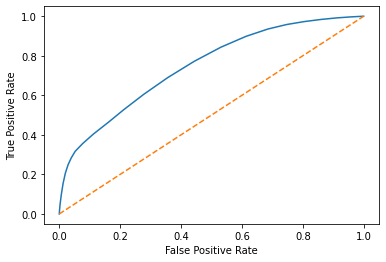

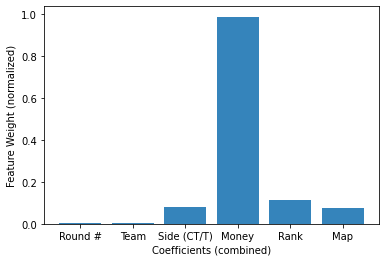

Stored 'predictions_p' (ndarray)
Stored 'values_p' (ndarray)
Stored 'predictions_p' (ndarray)
Stored 'values_p' (ndarray)
Stored 'fpr_list_p' (list)
Stored 'tpr_list_p' (list)


In [4]:
# create model object
perceptron = Perceptron()

# perform any preprocessing for this model, and split into train/test sets
X_train, X_test, y_train, y_test = perceptron.pre_process(Features)

# fit model using train set
perceptron.fit(X_train, y_train)

# use fitted model to make predictions on test set
predictions = perceptron.predict(X_test)

# print the accuracy score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# TPR, FPR, ROC
fpr_list, tpr_list = calculate_FPR_TPR(X_test, y_test, perceptron.predict_proba)

# plot ROC curve
plot_ROC_curve(fpr_list, tpr_list)

# weights chart setup
weights = perceptron.weights
np.abs(weights, out=weights)
values = []
values.append(np.sum(weights[0]) / 2)
values.append(np.sum(weights[1:2]) / 2)
values.append(np.sum(weights[3:4]) / 2)
values.append(np.sum(weights[5:6]) / 2)
values.append(np.sum(weights[7:8]) / 2)
values.append(np.sum(weights[9:18]) / (10))
values = values / np.linalg.norm(values)

# plot coefficient weights
plot_coefficents_chart(coefficent_chart_features, values)

predictions_p = predictions
values_p = values
%store predictions_p
%store values_p

fpr_list_p = fpr_list
tpr_list_p = tpr_list
%store predictions_p
%store values_p
%store fpr_list_p
%store tpr_list_p

-------------------
Logistic Regression
-------------------

In [5]:
# create model object
logisticRegression = LogisticRegression()

# perform any preprocessing for this model, and split into train/test sets
X_train, X_test, y_train, y_test = logisticRegression.pre_process(Features)

# fit model using train set
logisticRegression.fit(X_train, y_train)

# use fitted model to make predictions on test set
logisticRegressionPredictions = logisticRegression.predict(X_test)

logisticRegressionAccuracy = logisticRegression.accuracy(
    y_test, logisticRegressionPredictions
)
# print the accuracy score
print(f"Accuracy: {logisticRegressionAccuracy}")


Accuracy: 0.6709235105587231


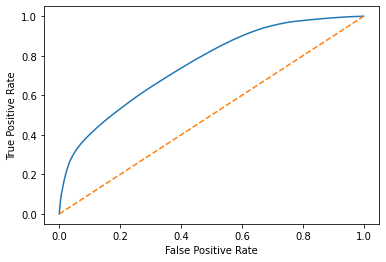

[ 2.17003016e-03  8.58126484e-03 -5.21880054e-03 -5.71272873e-02
  5.71272873e-02 -8.56561694e-01  8.60004150e-01  1.32841992e-01
 -1.36148905e-01 -1.84869076e-03  1.01388689e-03  1.25632864e-03
 -3.63773015e-03 -1.09073762e-03 -1.94132334e-03  2.08192470e-04
  1.12112344e-03  4.05713588e-03  1.37951725e-03]


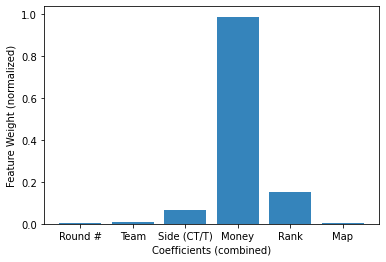

Stored 'predictions_LR' (list)
Stored 'values_LR' (ndarray)
Stored 'fpr_list_LR' (list)
Stored 'tpr_list_LR' (list)


In [6]:
# TPR, FPR, ROC
fpr_list, tpr_list = calculate_FPR_TPR(X_test, y_test, logisticRegression.predict_proba, 0, 1)

# plot ROC curve
plot_ROC_curve(fpr_list, tpr_list)

# weights chart setup
logisticRegressionWeights = logisticRegression.weights
print(logisticRegressionWeights)
np.abs(logisticRegressionWeights, out=logisticRegressionWeights)
values = []
values.append(np.sum(logisticRegressionWeights[0]) / 2)
values.append(np.sum(logisticRegressionWeights[1:2]) / 2)
values.append(np.sum(logisticRegressionWeights[3:4]) / 2)
values.append(np.sum(logisticRegressionWeights[5:6]) / 2)
values.append(np.sum(logisticRegressionWeights[7:8]) / 2)
values.append(np.sum(logisticRegressionWeights[9:18]) / (10))
values = values / np.linalg.norm(values)

# plot coefficient weights
plot_coefficents_chart(coefficent_chart_features, values)

predictions_LR = logisticRegressionPredictions
values_LR = values
fpr_list_LR = fpr_list
tpr_list_LR = tpr_list
%store predictions_LR
%store values_LR
%store fpr_list_LR
%store tpr_list_LR

-------------
Random Forest
-------------

In [7]:
# create model object
forest = RandomForest(n_estimators = 10, max_features = "number", max_features_num = 3, max_depth = 15, min_samples_split = 2, min_samples_leaf = 1)

# perform any preprocessing for this model, and split into train/test sets
X_train, X_test, y_train, y_test = forest.pre_process(Features, use_scalar=True)

# fit model using train set
forest.fit(X_train, y_train)

# use fitted model to make predictions on test set
predictions = forest.predict(X_test)
print(predictions, y_test)

# print the accuracy score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

predictions_rf = predictions
%store predictions_rf

Fitting tree with 3 features and 7500 samples.
Best Feature at Root Node:  map_6
Tree 0 has 11 nodes.
Fitting tree with 3 features and 7500 samples.
Best Feature at Root Node:  t2_money
Tree 1 has 1181 nodes.
Fitting tree with 3 features and 7500 samples.
Best Feature at Root Node:  map_6
Tree 2 has 11 nodes.
Fitting tree with 3 features and 7500 samples.
Best Feature at Root Node:  t2_money
Tree 3 has 1243 nodes.
Fitting tree with 3 features and 7500 samples.
Best Feature at Root Node:  t2_rank
Tree 4 has 845 nodes.
Fitting tree with 3 features and 7500 samples.
Best Feature at Root Node:  t1_rank
Tree 5 has 2031 nodes.
Fitting tree with 3 features and 7500 samples.
Best Feature at Root Node:  t2_money
Tree 6 has 1129 nodes.
Fitting tree with 3 features and 7500 samples.
Best Feature at Root Node:  t2_rank
Tree 7 has 2121 nodes.
Fitting tree with 3 features and 7500 samples.
Best Feature at Root Node:  t2_rank
Tree 8 has 779 nodes.
Fitting tree with 3 features and 7500 samples.
Best F

-----------
Naive Bayes
-----------

In [8]:
# create model object
naiveBayes = NaiveBayes()

# perform any preprocessing for this model, and split into train/test sets
X_train, X_test, y_train, y_test = naiveBayes.pre_process(Features)

# fit model using train set
naiveBayes.fit(X_train, y_train)

# use fitted model to make predictions on test set
naiveBayesPredictions = naiveBayes.predict(X_test)

naiveBayesAccuracy = naiveBayes.accuracy(y_test, naiveBayesPredictions)
# print the accuracy score
print(f"Accuracy: {naiveBayesAccuracy}")


        round_number team_1         team_2 t1_side t2_side  t1_money  \
0                  1     G2  Natus Vincere       t      ct    4350.0   
1                  2     G2  Natus Vincere       t      ct    1100.0   
2                  3     G2  Natus Vincere       t      ct   22100.0   
3                  4     G2  Natus Vincere       t      ct    9350.0   
4                  5     G2  Natus Vincere       t      ct   25750.0   
...              ...    ...            ...     ...     ...       ...   
807476            15  North      Immortals       t      ct   28800.0   
807477            16  North      Immortals      ct       t    4250.0   
807478            17  North      Immortals      ct       t   19300.0   
807479            18  North      Immortals      ct       t   24500.0   
807480            19  North      Immortals      ct       t   33000.0   

        t2_money  t1_rank  t2_rank  winner  ... map_0  map_1  map_2  map_3  \
0         4250.0        8        6       2  ...     1    

c:\Users\marka\Documents\git\CS4033_ML\CsgoParser\NaiveBayes.py:42: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self.gaussian_pdf(X, self.class_means[i], self.class_variances[i])), axis=1)


-----------
Combined Comparison
-----------

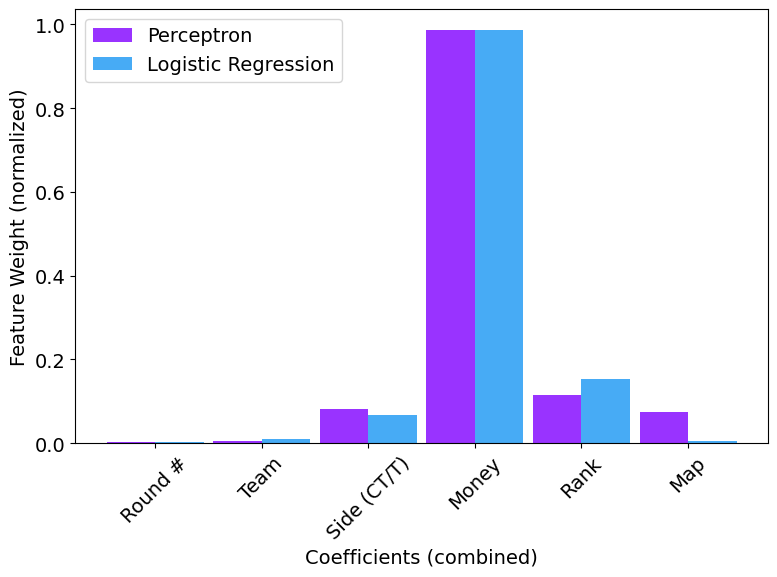

In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib.pyplot import cm
import numpy as np

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100

plt.rc('font', size=14)
plt.rc('axes', labelsize=50)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)  

plot_All_coefficents_chart(coefficent_chart_features, ['Perceptron', 'Logistic Regression'], valuesArray=[values_p, values_LR])

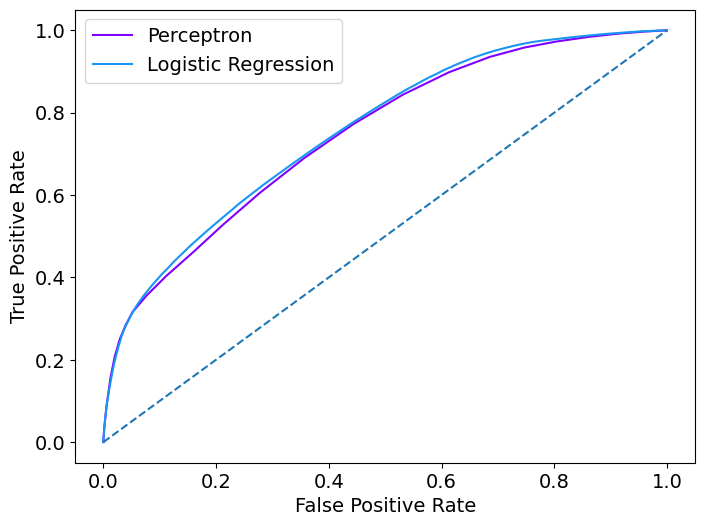

In [11]:
algos = ['Perceptron', 'Logistic Regression']
tpr_lists = [tpr_list_p, tpr_list_LR]
fpr_lists = [fpr_list_p, fpr_list_LR]
colors = cm.rainbow(np.linspace(0, 1, 6))

for algo, fpr, tpr, color in zip(algos, fpr_lists, tpr_lists, colors):
    plt.plot(fpr, tpr, color = color, label=algo)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()